<a href="https://colab.research.google.com/github/elisafiorina/MLCourse-INFN-2021/blob/main/Copia_di_DAY_4_MLCourse_INFN_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN ZALANDO classification 

The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

A- Load fashion mnist data and plot the first 9 images

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


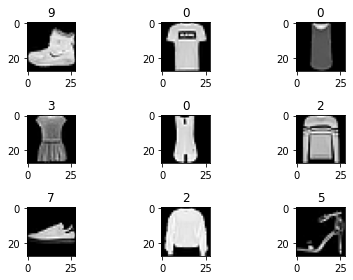

In [8]:
#Load Data
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset
print(f'Train: X={trainX.shape}, y={trainy.shape}')
print(f'Test: X={testX.shape}, y={testy.shape}')

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  plt.title(trainy[i])
# show the figure
plt.tight_layout()
plt.show()

B- Reshape to a single color channel images

In [9]:
#Every image must be in the form (height, width, number of channels)

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


C-Prepare the image for the DNN. Every features must be in the interval [0,1]

In [10]:
#Convert into float32 and normalize
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

D-Define a simple CNN model with Keras Sequential interface

In [11]:
# define cnn model and compile it
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

E- Fit the model

In [12]:
#Create the model and fit against train data
#Use 20% of training data as validation
model=define_model()
model.fit(train_norm, 
          trainy, 
          epochs=10, 
          batch_size=32, 
          validation_split=0.2, 
          verbose=1)

Epoch 1/10
1500/1500 [==============================] - 37s 5ms/step - loss: 0.5040 - accuracy: 0.8183 - val_loss: 0.3816 - val_accuracy: 0.8623
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3274 - accuracy: 0.8822 - val_loss: 0.3120 - val_accuracy: 0.8852
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2791 - accuracy: 0.8976 - val_loss: 0.2842 - val_accuracy: 0.9015
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2494 - accuracy: 0.9085 - val_loss: 0.2815 - val_accuracy: 0.8968
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2235 - accuracy: 0.9172 - val_loss: 0.2847 - val_accuracy: 0.8961
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2035 - accuracy: 0.9249 - val_loss: 0.2888 - val_accuracy: 0.8988
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1874 - accuracy: 0.9296 - val_loss: 0.2712 - val_accuracy

F-Evaluate the performance with the test set

In [13]:
#get the test accuracy
_, acc = model.evaluate(test_norm, testy, verbose=0)
print(f'> {(acc * 100.0):.2f}')


> 90.32


In [14]:
#print the classification report
y_prob=model.predict(test_norm)
predy = np.argmax(y_prob, axis=1)
print(classification_report(testy,predy))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.82      0.85      1000
           3       0.94      0.86      0.90      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.80      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



## CIFAR 10 EXAMPLE


https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529

https://www.cs.toronto.edu/~kriz/cifar.html

We will use CIFAR-10 dataset to build a CNN image classifier. CIFAR-10 dataset has 10 different labels
*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship
*   Truck


It has 50,000 training data and 10,000 testing image data. Image size in CIFAR-10 is 32 x 32 x 3. It comes with Keras library.

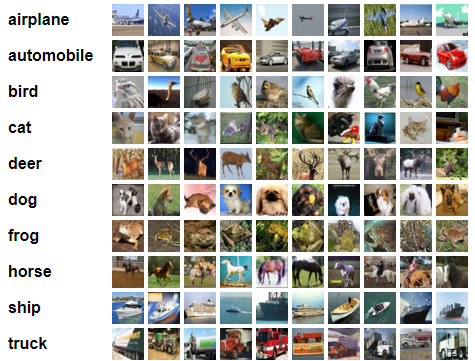

In [ ]:
#check GPU availability
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Some useful import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras=tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.datasets import cifar10
!pip install livelossplot

In [ ]:
#Load cifar10 dataset from keras
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Check shapes
print(f'Training data shape : {train_images.shape} {train_labels.shape}')
print(f'Testing data shape : {test_images.shape} {test_labels.shape}')

Training data shape : (50000, 32, 32, 3) (50000, 1)
Testing data shape : (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Find the unique numbers of train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes, "\n")

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9] 



In [ ]:
_ , counts = np.unique(train_labels,return_counts=True)
print(counts)

[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


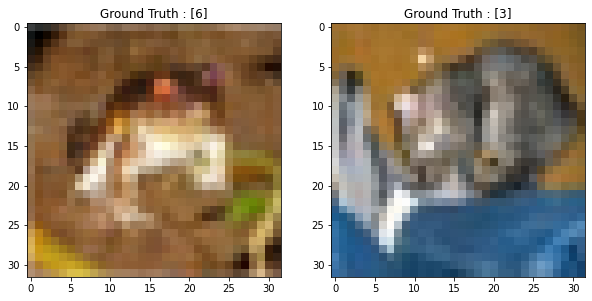

In [ ]:
# Display the first image in training and test data
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.title("Ground Truth : {}".format(train_labels[0]))
plt.imshow(train_images[0,:,:], cmap='gray')

plt.subplot(122)
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.imshow(test_images[0,:,:], cmap='gray')

In [ ]:
#get row col and channel
nRows,nCols,nDims = train_images.shape[1:]
input_shape = (nRows, nCols, nDims)
print(train_images.dtype)
train_data = train_images.astype('float32')
test_data = test_images.astype('float32')
print(train_data.shape)

uint8
(50000, 32, 32, 3)


In [ ]:
print(train_images.dtype)
print(train_data.dtype)

uint8
float32


In [ ]:
#Normalize the data
train_data /= 255
test_data /= 255

#convert in onehot rapresentation the labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Create a CNN model with keras layers
#padding same = with zeros
def createModel(dropout, activation, dense, kernel, pool):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)
  model = Sequential()
  model.add(Conv2D(32, kernel, padding='same', activation=activation, input_shape=input_shape))
  model.add(Conv2D(32, kernel, activation=activation))
  model.add(MaxPooling2D(pool_size=pool))
  model.add(Dropout(dropout))

  model.add(Conv2D(64, kernel, padding='same', activation=activation))
  model.add(Conv2D(64, kernel, activation=activation))
  model.add(MaxPooling2D(pool_size=pool))
  model.add(Dropout(dropout))

  model.add(Conv2D(64, kernel, padding='same', activation=activation))
  model.add(Conv2D(64, kernel, activation=activation))
  model.add(MaxPooling2D(pool_size=pool))
  model.add(Dropout(dropout))

  model.add(Flatten())
  model.add(Dense(dense, activation=activation))
  model.add(Dropout(dropout))
  model.add(Dense(nClasses, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
#Initial parameters
dropout=0.25
activation='relu'
dense=512
kernel=(3,3)
pool=(2,2)
batch_size = 256
epochs = 50

In [ ]:
cnnmodel = createModel(dropout, activation, dense, kernel, pool)
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

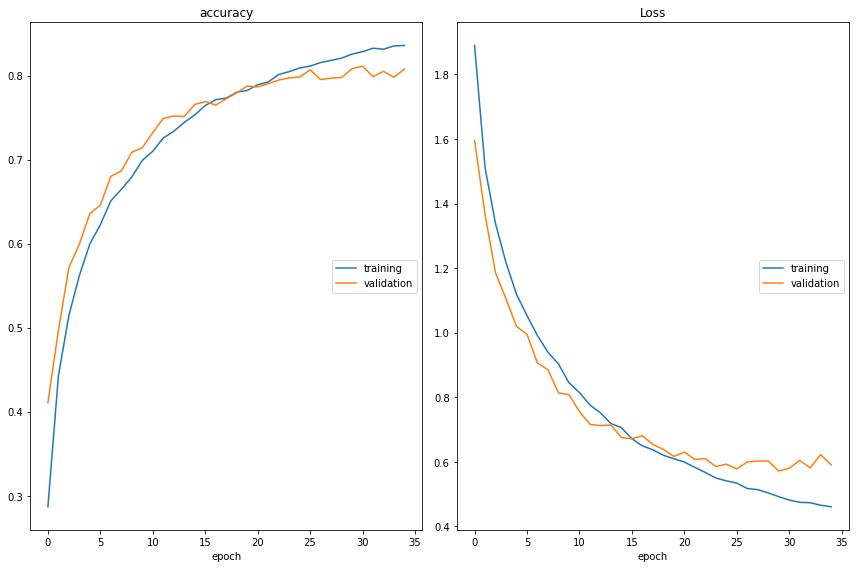

accuracy
	training         	 (min:    0.287, max:    0.836, cur:    0.836)
	validation       	 (min:    0.411, max:    0.811, cur:    0.808)
Loss
	training         	 (min:    0.461, max:    1.890, cur:    0.461)
	validation       	 (min:    0.571, max:    1.596, cur:    0.590)


In [ ]:
from livelossplot import PlotLossesKerasTF


plotlosses = PlotLossesKerasTF()
model_checkpoint = keras.callbacks.ModelCheckpoint("cnn_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callbacks=[model_checkpoint, plotlosses]
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')


history = cnnmodel.fit(train_data, 
                     train_labels_one_hot, 
                     batch_size=batch_size, 
                     epochs=epochs, 
                     verbose=1, 
                     validation_split=0.2,
                     callbacks=[model_checkpoint, plotlosses, early_stopping])

In [ ]:
#evaluation on test
cnnmodel = keras.models.load_model("cnn_checkpoint.h5")
cnnmodel.evaluate(test_data, test_labels_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.5999 - accuracy: 0.7991


[0.5999143123626709, 0.7990999817848206]

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Suggested exercises

Try to rewrite WITHOUT one hot encoding

In [ ]:
#YOUR CODE HERE


In [ ]:
#What happens when i change the model hyper-parameters?

#Modify the activation function (use swish and/or tanh)
#dropout rate try 0 and 0.5 
#put the dense layer dimension to 1024
#try to change the kernel size to (2,2) and/or (5,5)
#train for 20 epochs, batch size 512 (how compares with previous batch size?)

#what do u expect?

#record the effect on the test accuracy
batch_size = 512
epochs = 20

#YOUR CODE HERE

In [ ]:
#USE A GRID SEARCH ON DROPOUT AND ACTIVATION, with a smaller DNN
#YOUR CODE HERE


## AUTOENCODER  -  Anomaly detection and denoising

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


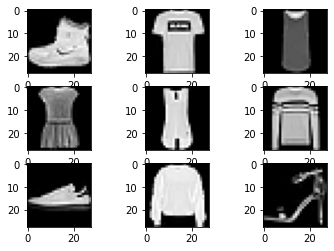

In [ ]:
#LOAD FASHION MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28)
Test: X=(10000, 28, 28)


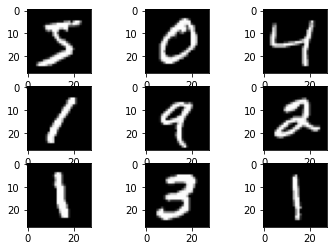

In [ ]:
#LOAD MNIST
(train_data, _), (test_data, _) = mnist.load_data()
# summarize loaded dataset
print(f'Train: X={train_data.shape}')
print(f'Test: X={test_data.shape}')
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
#NORMALIZE, CONVERT TO FLOAT, RESHAPE
train_data=train_data.astype('float32') / 255.0
test_data=test_data.astype('float32') / 255.0
trainX=trainX.astype('float32') / 255.0
testX=testX.astype('float32') / 255.0

train_data = np.reshape(train_data, (train_data.shape[0], 28, 28, 1))
test_data = np.reshape(test_data, (test_data.shape[0], 28, 28, 1))
trainX = np.reshape(trainX, (len(trainX), 28, 28, 1))
testX = np.reshape(testX, (len(testX), 28, 28, 1))

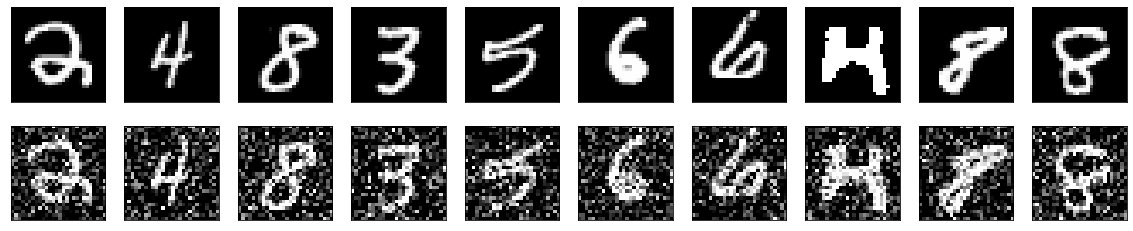

In [ ]:
#CREATE AND DISPLAY A NOISY COPY OF TRAINING DATA
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)
display(train_data, noisy_train_data)

In [ ]:
#BUILD THE CNN AUTOENCODER (Functional Interface)

input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 32)        9248

Now we can train our autoencoder using train_data as both our input data and target. Notice we are setting up the validation data using the same format.

In [ ]:
#FIT TO CORRECTLY RECONSTRUCT MNIST IMAGES
autoencoder.fit(x=train_data,
                y=train_data,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_data, test_data),
                )

Epoch 1/50
469/469 [==============================] - 9s 17ms/step - loss: 0.1342 - val_loss: 0.0738
Epoch 2/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0718 - val_loss: 0.0695
Epoch 3/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0693 - val_loss: 0.0680
Epoch 4/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0667 - val_loss: 0.0662
Epoch 7/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0663 - val_loss: 0.0657
Epoch 8/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0659 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0656 - val_loss: 0.0650
Epoch 10/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0653 - val_lo

In [ ]:
keras.models.save_model(autoencoder, "./autoencoder.h5")

In [ ]:
autoencoder = keras.models.load_model("./autoencoder.h5")

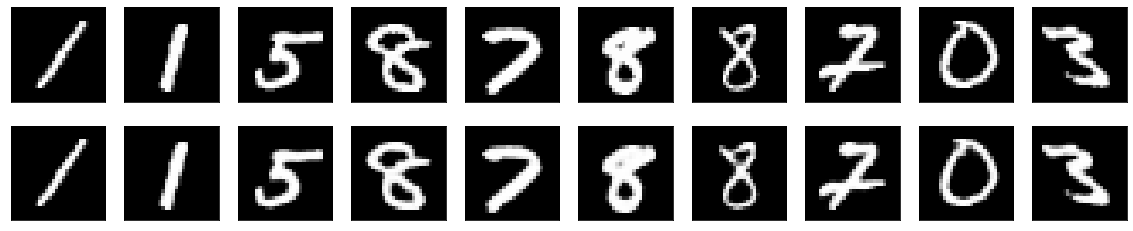

In [ ]:
#PREDICTIONS (CORRECT RECONSTRUCTIONS)
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
#Structural Similarity Index
from skimage.metrics import structural_similarity as ssim
for i in range(0, 12):
  s = ssim(test_data[i], predictions[i], multichannel=True)
  print(s)

0.9956955854124321
0.9943183200850104
0.9982510693277354
0.995355194069248
0.9953456624211867
0.9983510709000865
0.9939622058887503
0.9924758891634484
0.9921832216212154
0.9877611347026667
0.9940976880712381
0.9848747352053964


(50000, 32, 32, 3)
(50000, 28, 28, 1)


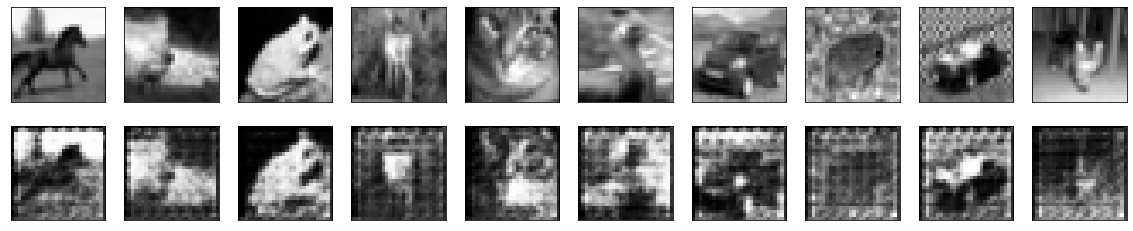

In [ ]:
#Load cifar10 dataset from keras
from keras.datasets import cifar10
import cv2

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images=train_images.astype('float32') / 255.0

print(train_images.shape)


#Go to BW and resize to MNIST dimensions,
train_cifar=np.array([cv2.cvtColor(xi, cv2.COLOR_BGR2GRAY) for xi in train_images])
train_cifar=np.array([cv2.resize(xi, (28,28)) for xi in train_cifar])
train_cifar = np.reshape(train_cifar, (train_cifar.shape[0], 28, 28, 1))
print(train_cifar.shape)

#Autoencoder predictions
predictions = autoencoder.predict(train_cifar)
display(train_cifar, predictions)

In [ ]:
#ANOMALY DETECTION!!
#s = ssim(train_cifar[33], predictions[33], multichannel=True)
for i in range(0, 12):
  s = ssim(train_cifar[i], predictions[i], multichannel=True)
  print(s)

0.7205383019399619
0.7825618713809163
0.7107327323916228
0.743121961547595
0.7122658304100911
0.6895830447290036
0.6339388549267366
0.7502769427359022
0.6754686438607903
0.7461771966066921
0.6656032228844598
0.7562422622331019


Now that we know that our autoencoder works, let's retrain it using the ***noisy data as our input*** and the ***clean data as our target***. We want our autoencoder to learn how to denoise the images.

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0908 - val_loss: 0.0896
Epoch 2/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0899 - val_loss: 0.0888
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0893 - val_loss: 0.0883
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0888 - val_loss: 0.0879
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0884 - val_loss: 0.0874
Epoch 6/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0881 - val_loss: 0.0871
Epoch 7/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0877 - val_loss: 0.0869
Epoch 8/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0874 - val_loss: 0.0868
Epoch 9/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0872 - val_loss: 0.0864
Epoch 10/100
469/469 [==============================] - 8s 16ms/step - loss: 0.087

In [ ]:
keras.models.save_model(autoencoder, "./denoise_autoencoder.h5")

In [ ]:
autoencoder = keras.models.load_model("./denoise_autoencoder.h5")

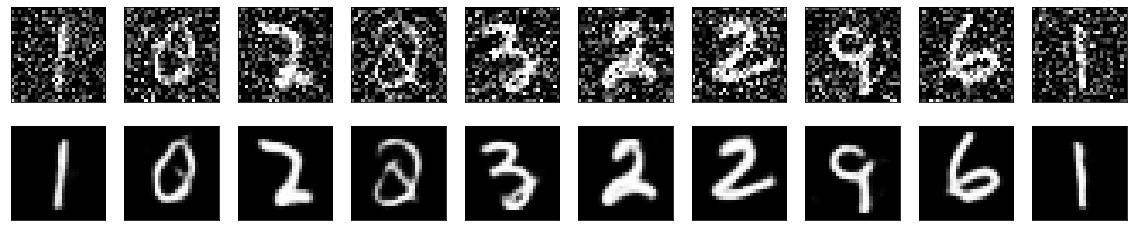

In [ ]:
#DENOISE!
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

## DENOISE with intermediate layer visualization

In [1]:
## load the libraries 
import sys
import warnings
import os
import glob
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.metrics import *
from tensorflow.keras.optimizers import Adam, RMSprop
from scipy.stats import norm
from keras.preprocessing import image
from keras import datasets

from keras import backend as K

from imgaug import augmenters
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
## Download the data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
## normalize and reshape
x_train = x_train/255.
x_test = x_test/255.

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

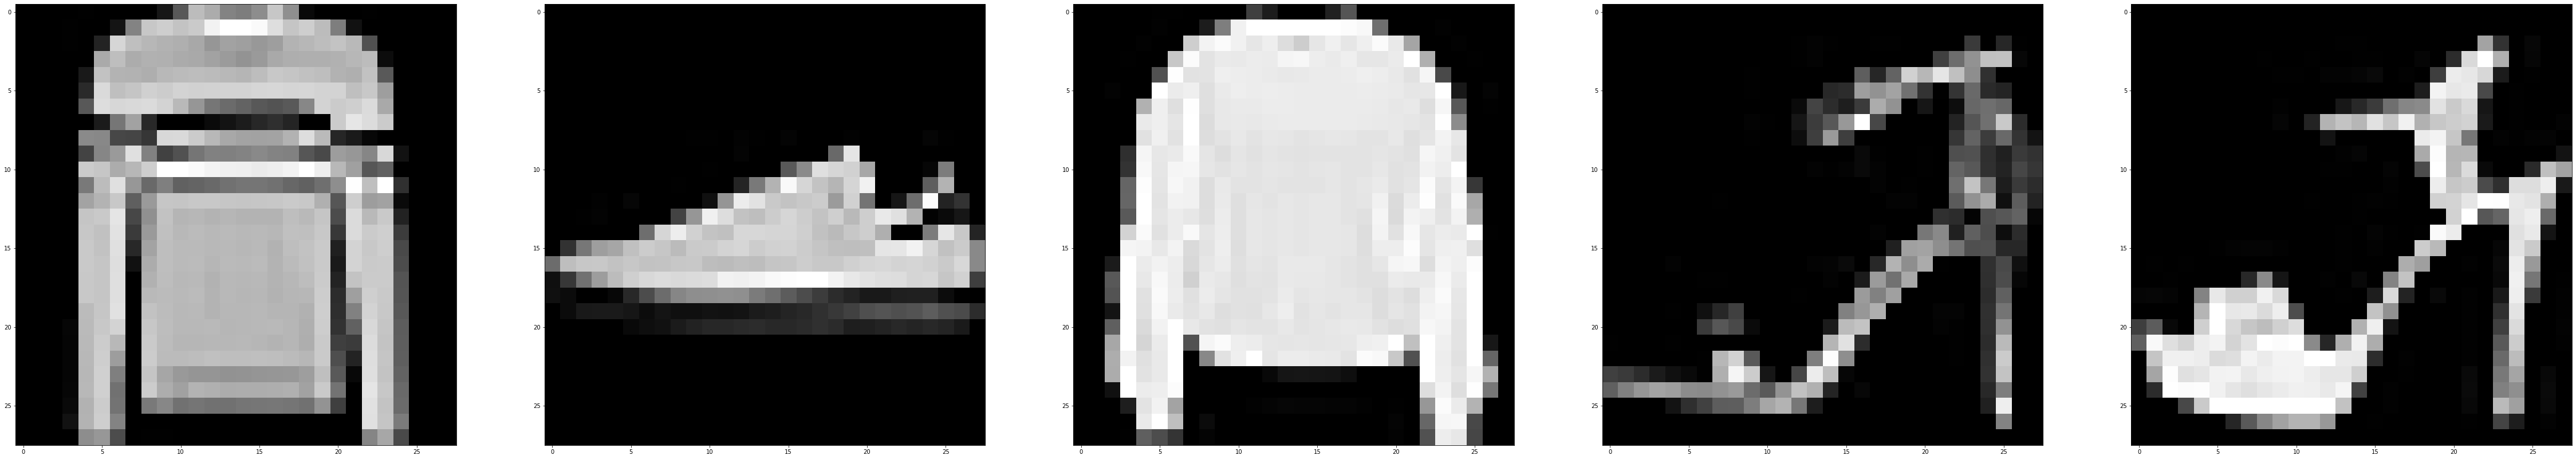

In [4]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(x_train[i, :, :, 0].reshape(28, 28))

In [5]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

#slow
train_x_n = seq_object.augment_images(x_train * 255) / 255
val_x_n = seq_object.augment_images(x_test * 255) / 255

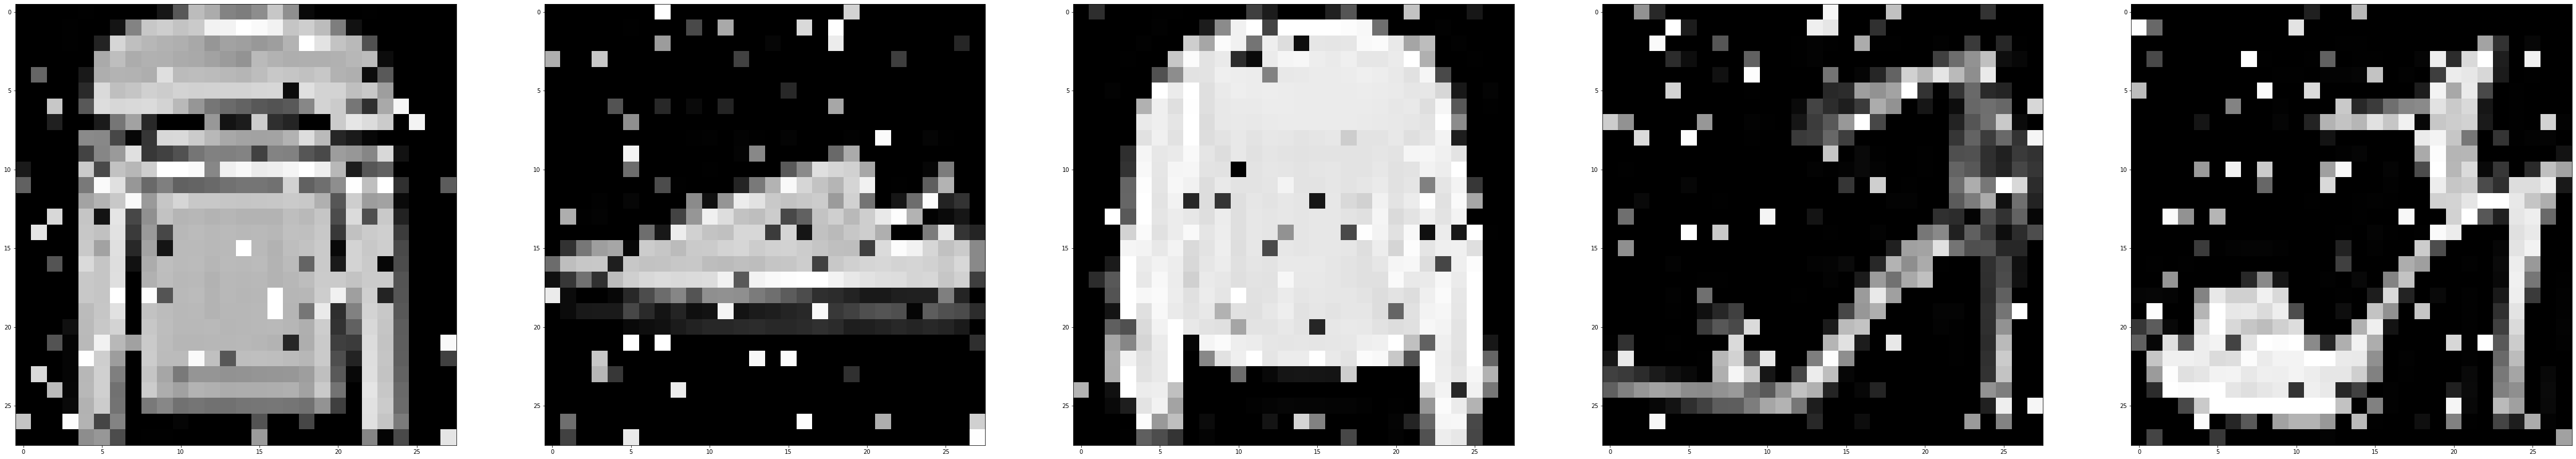

In [6]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i, :, :, 0].reshape(28, 28))

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

In [ ]:
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

In [ ]:
# compile the model (from input to output)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0     

In [ ]:
history = model.fit(train_x_n, x_train, epochs=50, batch_size=2048, validation_data=(val_x_n, x_test))

Epoch 1/50
30/30 [==============================] - 13s 299ms/step - loss: 0.0759 - val_loss: 0.0455
Epoch 2/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0377 - val_loss: 0.0325
Epoch 3/50
30/30 [==============================] - 7s 223ms/step - loss: 0.0302 - val_loss: 0.0280
Epoch 4/50
30/30 [==============================] - 7s 224ms/step - loss: 0.0265 - val_loss: 0.0248
Epoch 5/50
30/30 [==============================] - 7s 223ms/step - loss: 0.0240 - val_loss: 0.0229
Epoch 6/50
30/30 [==============================] - 7s 224ms/step - loss: 0.0223 - val_loss: 0.0218
Epoch 7/50
30/30 [==============================] - 7s 223ms/step - loss: 0.0212 - val_loss: 0.0207
Epoch 8/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0204 - val_loss: 0.0199
Epoch 9/50
30/30 [==============================] - 7s 224ms/step - loss: 0.0197 - val_loss: 0.0193
Epoch 10/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0191 - val_loss: 0.018

Visualize intermediate layers

In [ ]:
# compile the model (ENCODER: from input to latent view) 
# The model is already fitted
model_2 = Model(input_layer, latent_view)
model_2.compile(optimizer='adam', loss='mse')

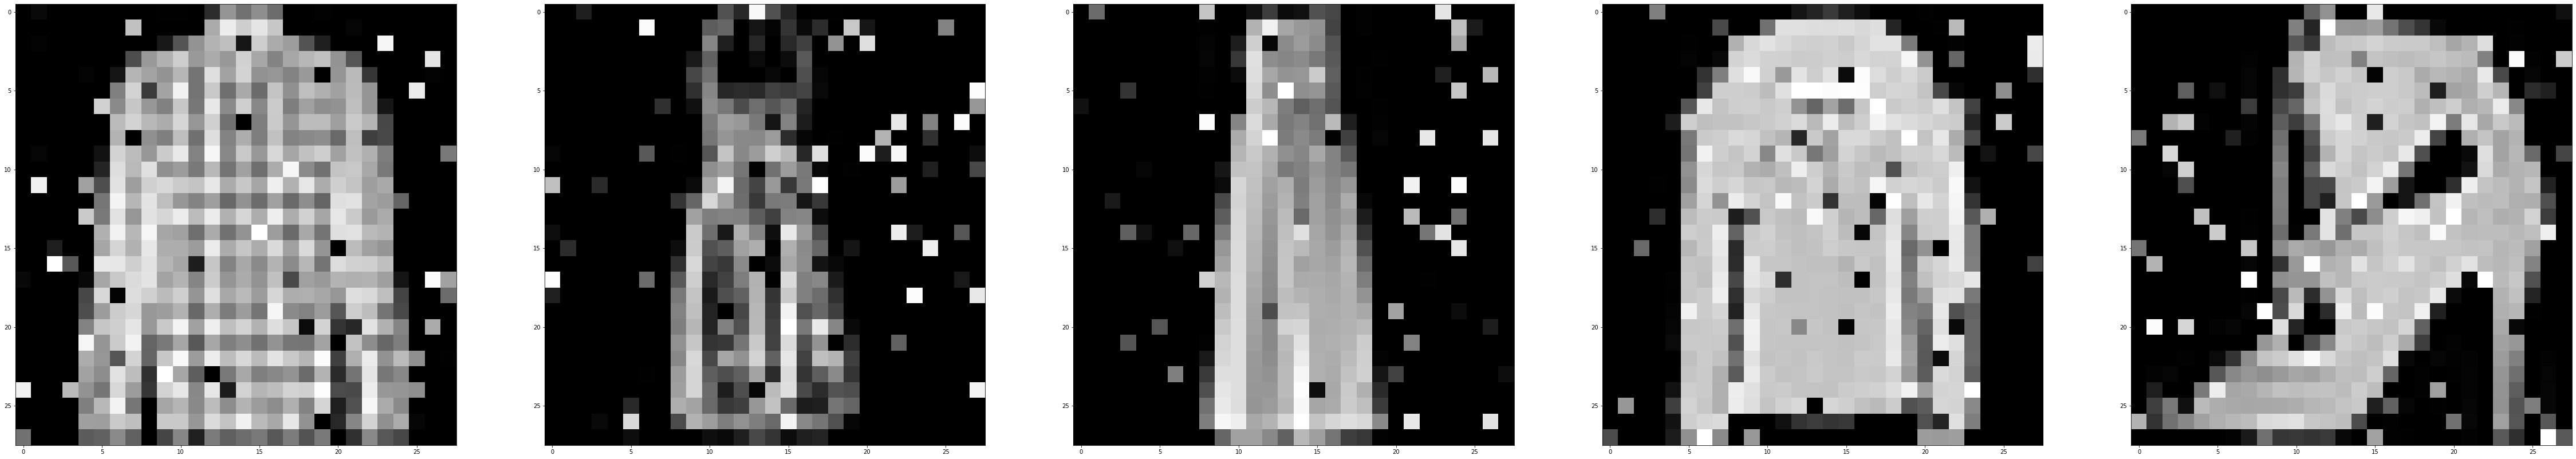

In [ ]:
n = np.random.randint(0,len(val_x_n)-5)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(val_x_n[a, :, :, 0].reshape(28, 28))
plt.show()

In [ ]:
preds = model_2.predict(val_x_n[n:n+5])
preds.shape

(5, 4, 4, 16)

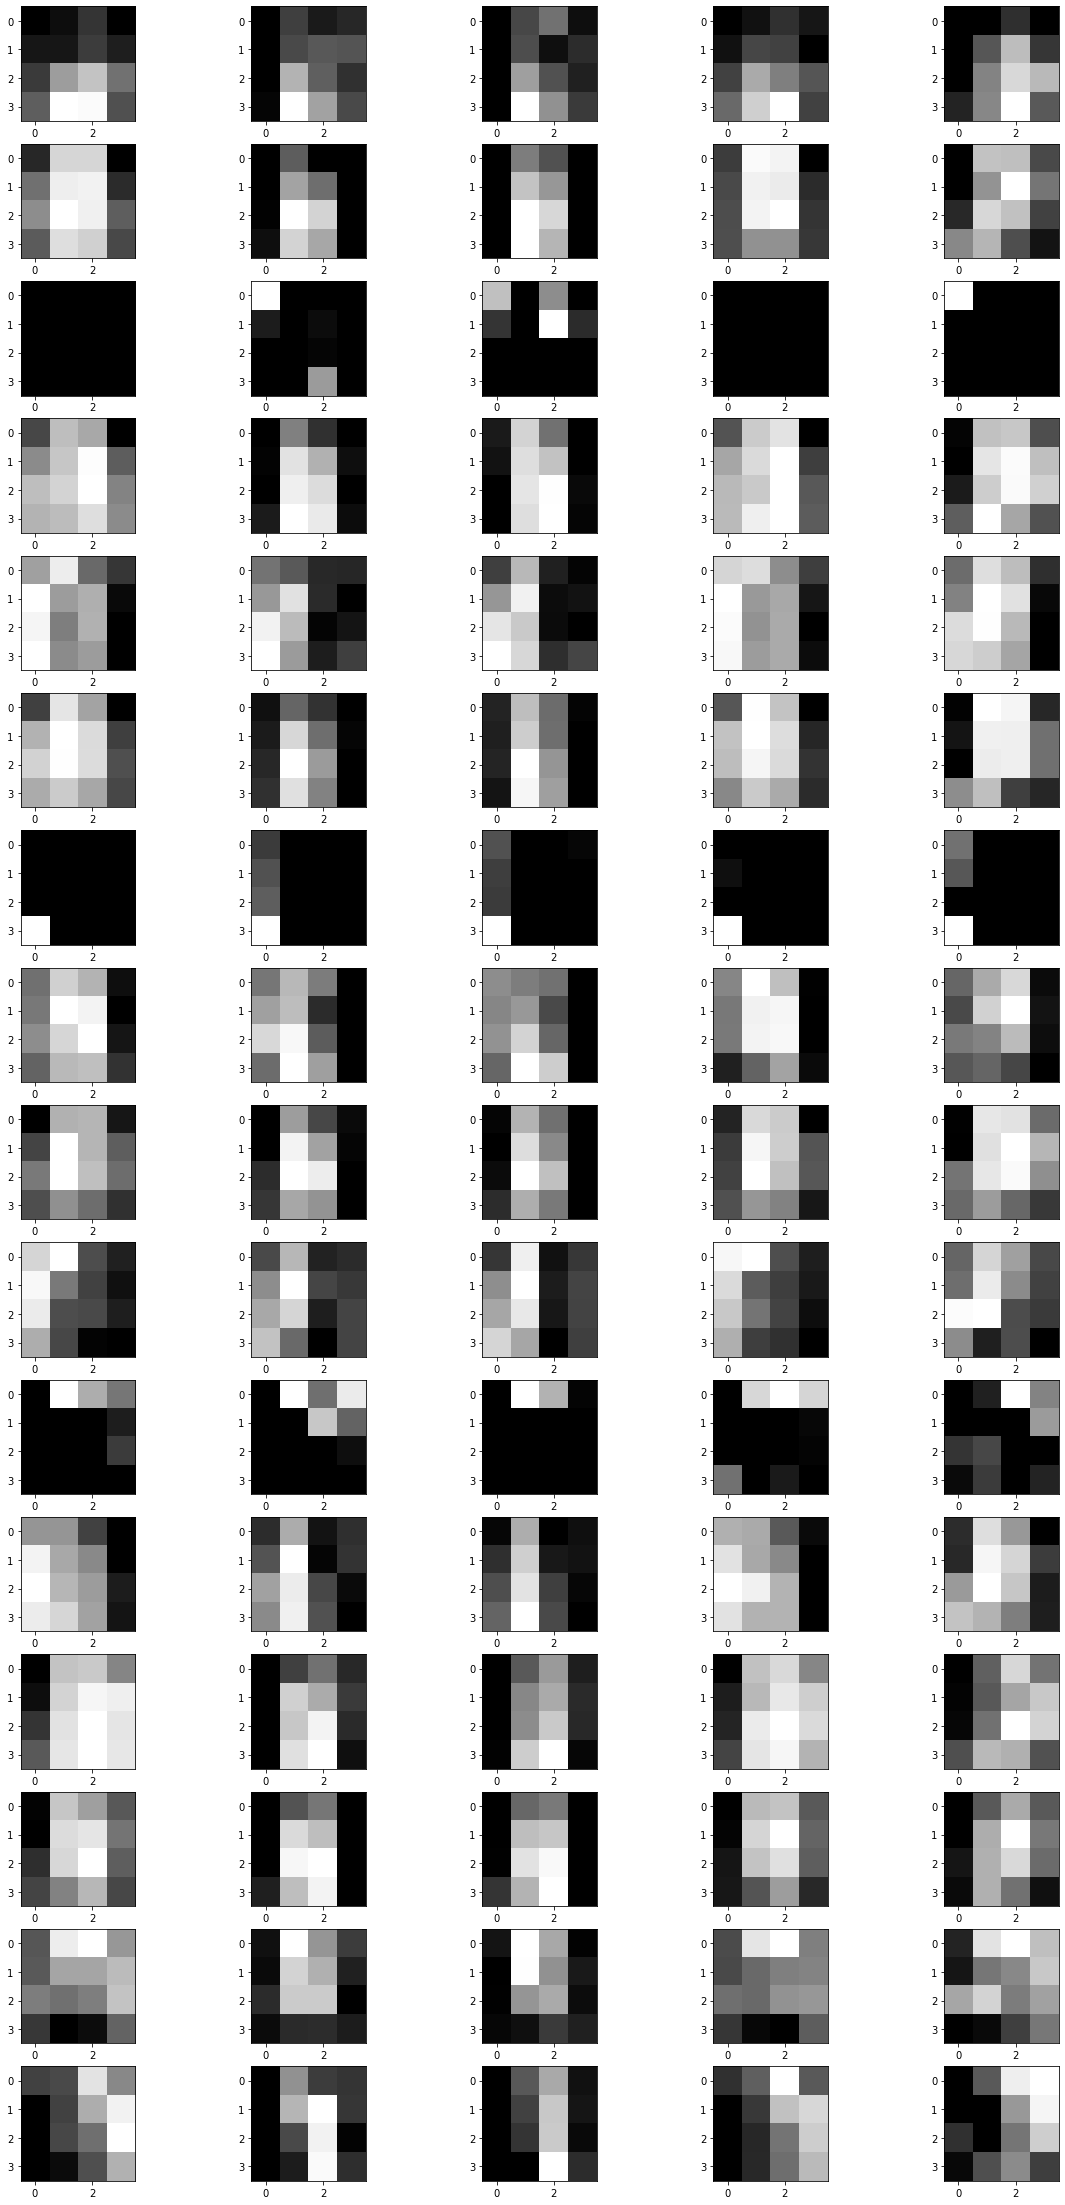

In [ ]:
#show the latent layer
f, ax = plt.subplots(16,5)
ax = ax.ravel()
f.set_size_inches(20, 40)
for j in range(16):
    for i,a in enumerate(range(n,n+5)):
        ax[j*5 + i].imshow(preds[i, :, :, j])
plt.show()

In [ ]:
n = np.random.randint(0,len(val_x_n)-5)

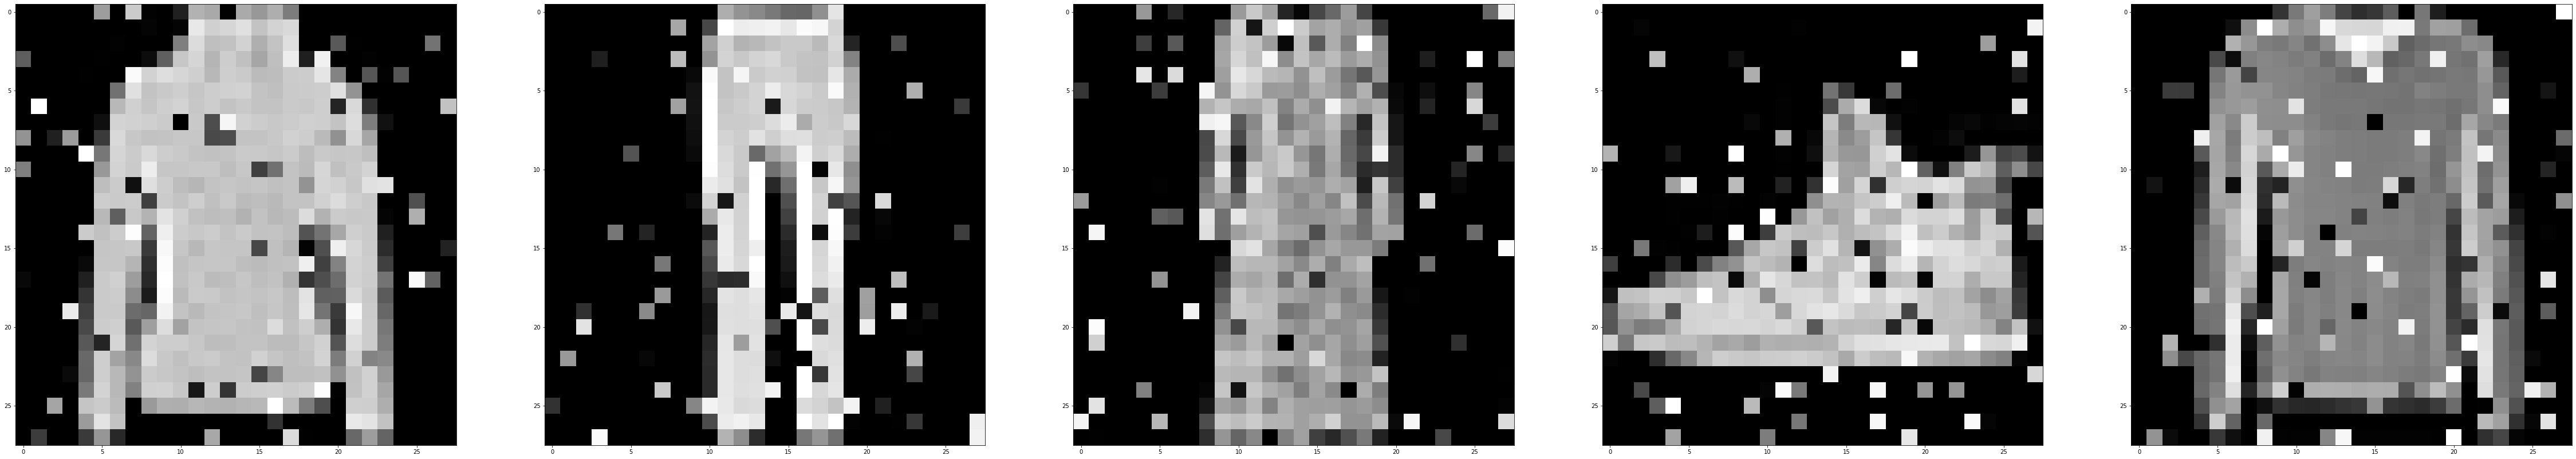

In [ ]:
#show the noise images (from n to n+5)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(val_x_n[a, :, :, 0].reshape(28, 28))

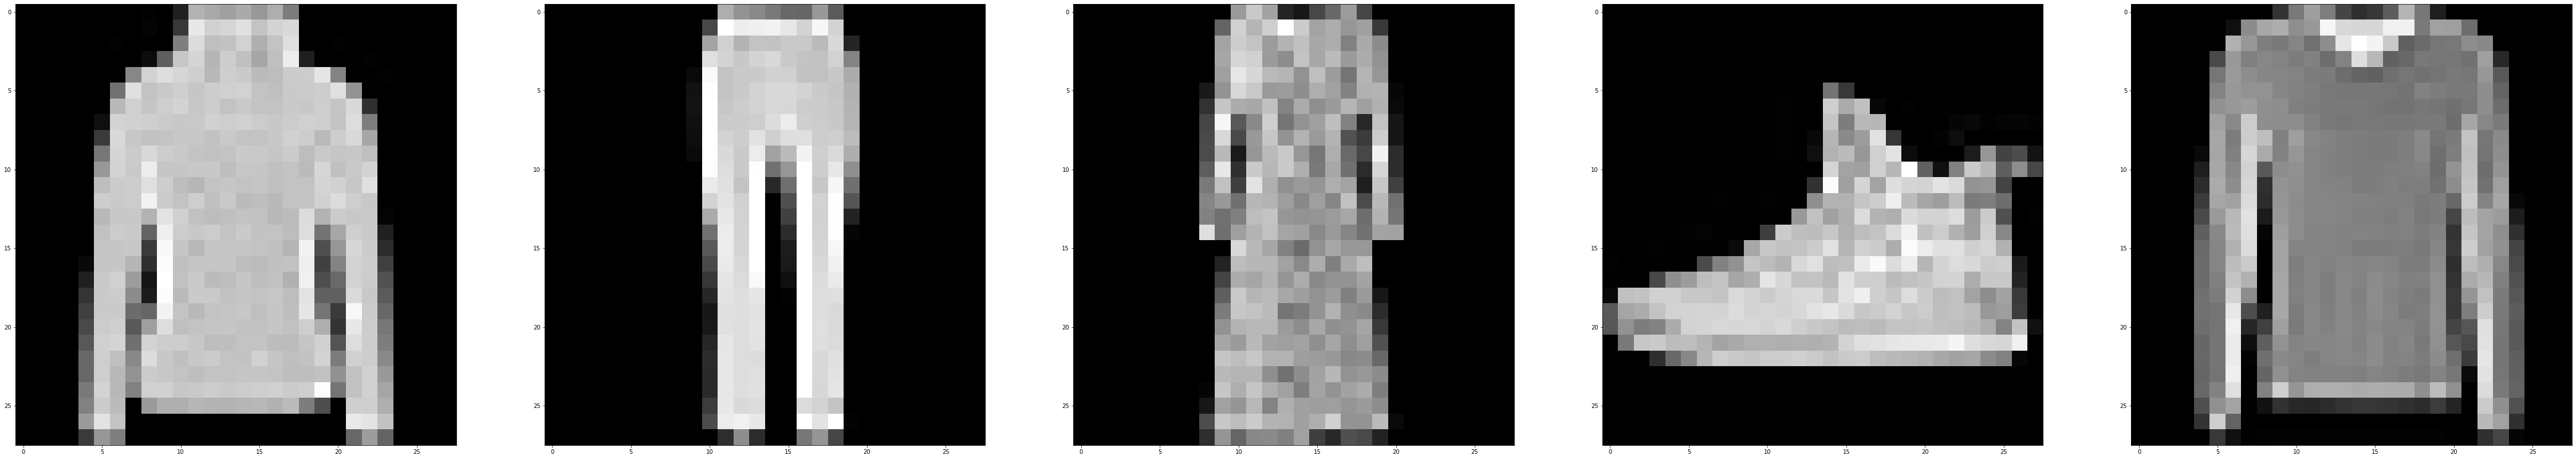

In [ ]:
#show the original images (from n to n+5)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(x_test[a, :, :, 0].reshape(28, 28))

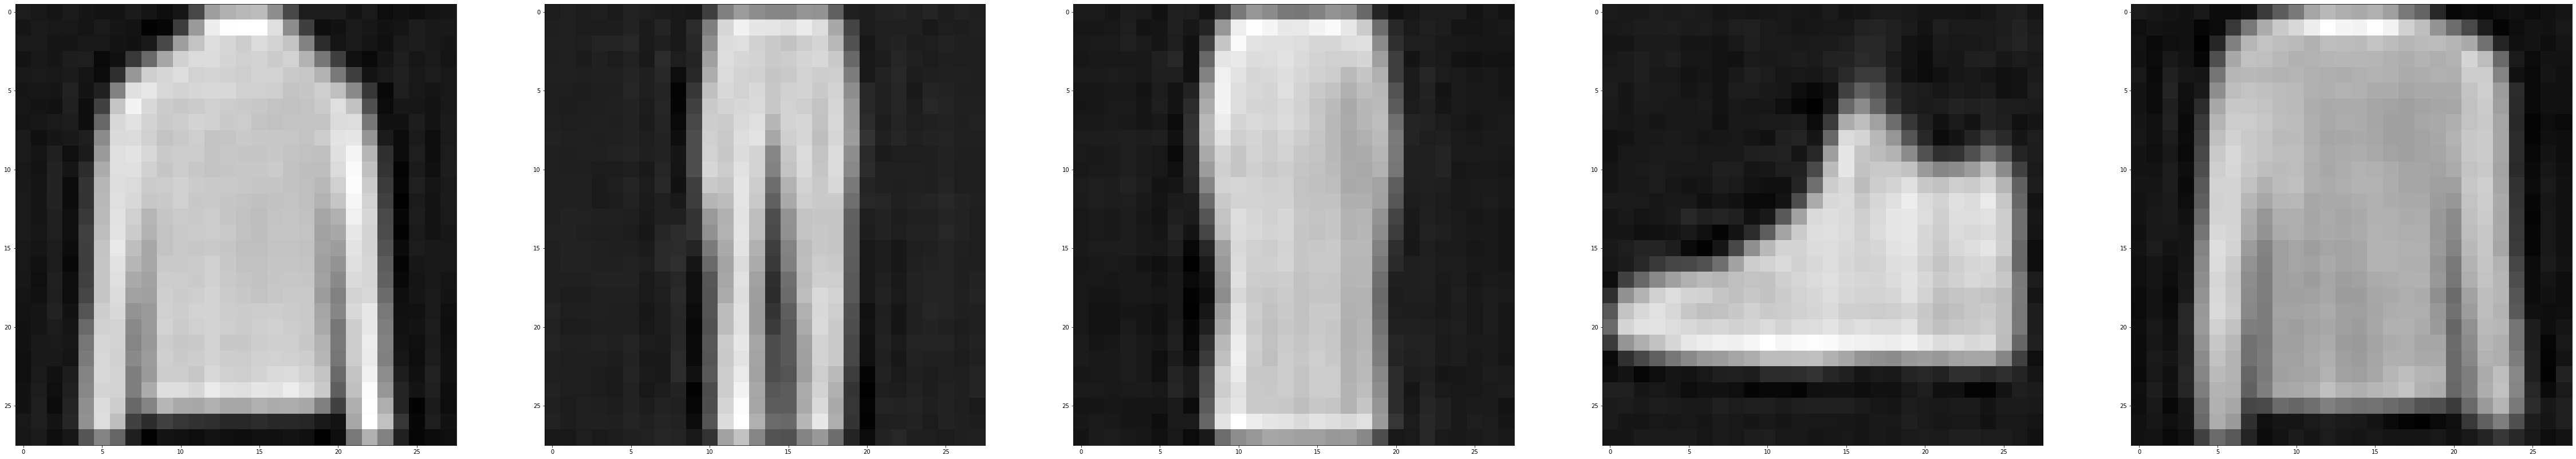

In [ ]:
#show the autoencoder prediction 
preds = model.predict(val_x_n[n:n+5])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

https://hub.gke2.mybinder.org/user/mrdragonbear-autoencoders-glu7ures/lab/tree/Autoencoder-Tutorial.ipynb

## VAE for Zalando generation

In [ ]:
## load the libraries 
import sys
import warnings
import os
import glob
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.metrics import *
from tensorflow.keras.optimizers import Adam, RMSprop
from scipy.stats import norm
from keras.preprocessing import image
from keras import datasets

from keras import backend as K

from imgaug import augmenters
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.fashion_mnist.load_data()
train_x, val_x = train_test_split(train_x, test_size=0.2)
train_x = train_x/255.
val_x = val_x/255.
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
batch_size = 16
latent_dim = 2  # Number of latent dimension parameters

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img)
x = Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)
x = Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
x = Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)

# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = Flatten()(x)
x = Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = Dense(latent_dim)(x)
z_log_sigma = Dense(latent_dim)(x)

In [ ]:
# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = Lambda(sampling)([z_mu, z_log_sigma])

In [ ]:
# decoder takes the latent distribution sample as input
decoder_input = Input(K.int_shape(z)[1:])

# Expand to 784 total pixels
x = Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# reshape
x = Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x)
x = Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)

In [ ]:
# construct a custom layer to calculate the loss
class CustomVariationalLayer(Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        xent_loss = binary_crossentropy(x, z_decoded)
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [ ]:
# VAE model statement
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)

In [ ]:
vae.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
#Why y=None?
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)
vae.fit(x=train_x, y=None,
        shuffle=True,
        epochs=20,
        batch_size=batch_size,
        validation_data=(val_x, None))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 89s 2ms/sample - loss: 0.3744 - val_loss: 0.3407
Epoch 2/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3381 - val_loss: 0.3344
Epoch 3/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3334 - val_loss: 0.3311
Epoch 4/20
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.3309 - val_loss: 0.3309
Epoch 5/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3294 - val_loss: 0.3281
Epoch 6/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3283 - val_loss: 0.3274
Epoch 7/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3276 - val_loss: 0.3272
Epoch 8/20
48000/48000 [==============================] - 51s 1ms/sample - loss: 0.3269 - val_loss: 0.3267
Epoch 9/20
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.3263 - val_

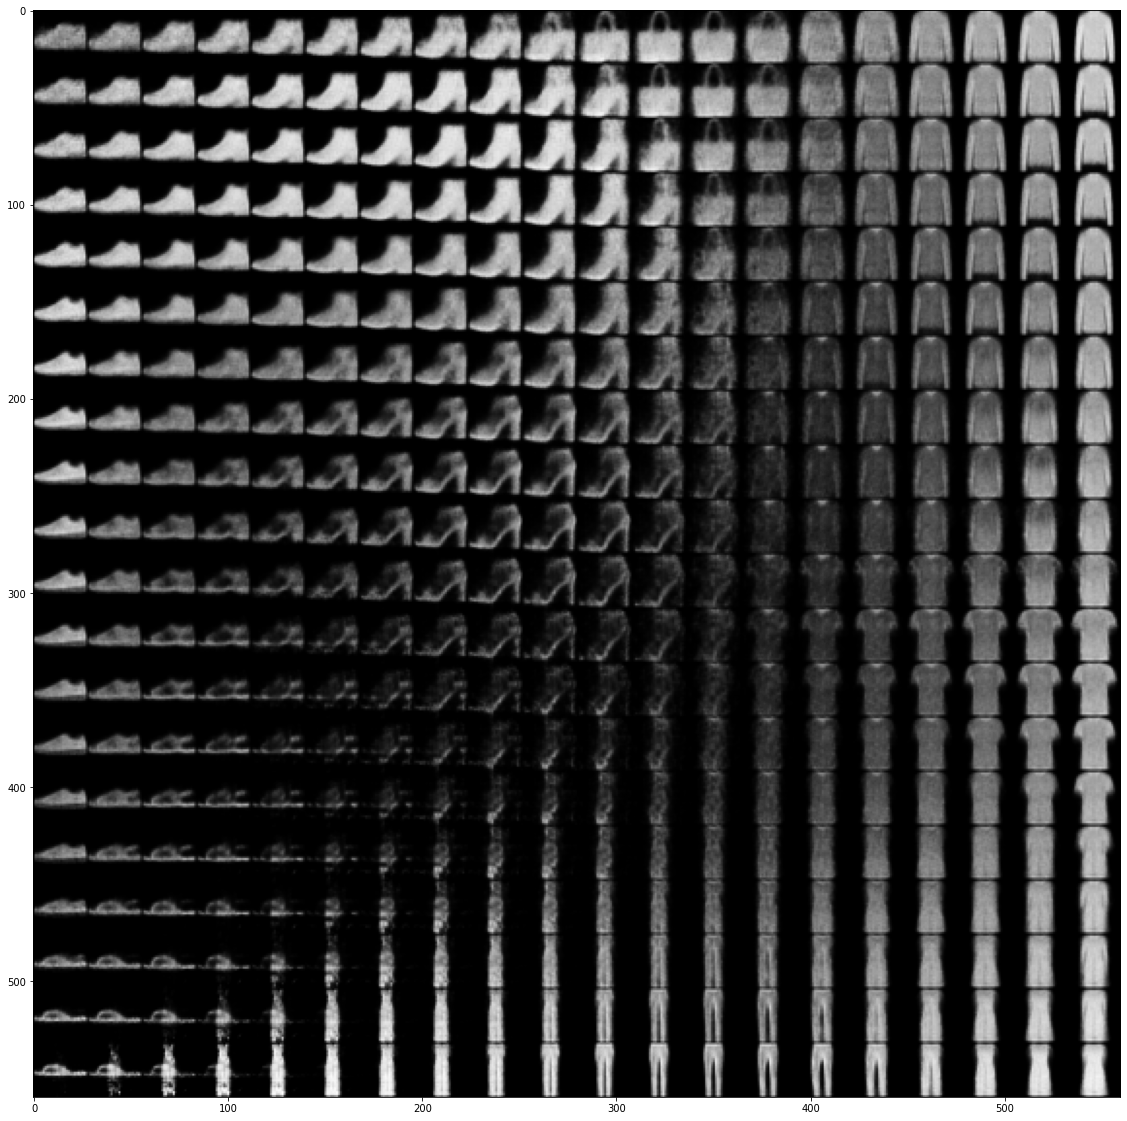

In [ ]:
# Visualize Samples reconstructed by VAE
# Display a 2D manifold of the samples
n = 20  # figure with 20x20 samples
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Construct grid of latent variable values - can change values here to generate different things
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

# decode for each square in the grid
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        #decoder
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()  

In [ ]:
#VAE: Visualize latent space
(train_x, train_y), (test_x, test_y) = datasets.fashion_mnist.load_data()
train_x = train_x/255.
train_x = train_x.reshape(-1, 28, 28, 1)

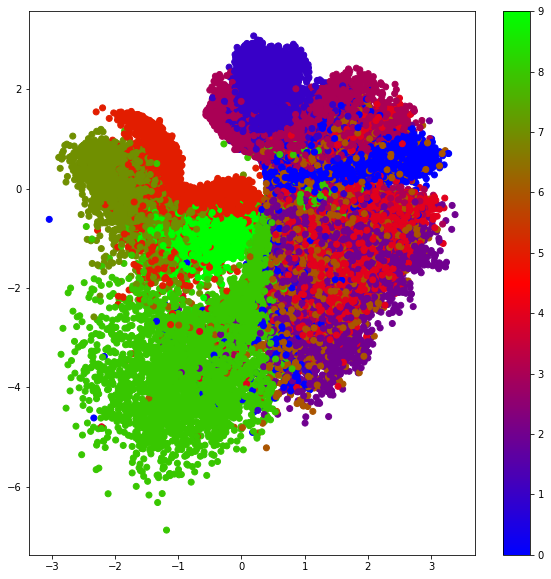

In [ ]:
# Translate into the latent space
encoder = Model(input_img, z_mu)
x_valid_noTest_encoded = encoder.predict(train_x, batch_size=batch_size)
plt.figure(figsize=(10, 10))
plt.scatter(x_valid_noTest_encoded[:, 0], x_valid_noTest_encoded[:, 1], c=train_y, cmap='brg')
plt.colorbar()
plt.show()

https://indico.cern.ch/event/753572/contributions/3121415/attachments/1707102/2750927/VAE.html


## LSTM

In this Keras Tutorial we analyze a simple example of LSTM model which will train to learn a kind of language and writing style similar to the Divine Comedy.

In [ ]:
import io
import numpy as np
import random
from keras.utils.data_utils import get_file
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import CuDNNLSTM
from keras.layers import RNN
from tensorflow.keras.optimizers import RMSprop, Adam

path = get_file('divina_commedia.txt', origin='https://www.retineuraliartificiali.net/keras_tutorial/divina_commedia.txt')

In [ ]:
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('\n\n\n\n\n','*****************first 1000 chars************\n',
      text[0:1000],'\n***********************************************\n')






 *****************first 1000 chars************
 inferno



inferno: canto i


nel mezzo del cammin di nostra vita
  mi ritrovai per una selva oscura
  che' la diritta via era smarrita.

ahi quanto a dir qual era e` cosa dura
  esta selva selvaggia e aspra e forte
  che nel pensier rinova la paura!

tant'e` amara che poco e` piu` morte;
  ma per trattar del ben ch'i' vi trovai,
  diro` de l'altre cose ch'i' v'ho scorte.

io non so ben ridir com'i' v'intrai,
  tant'era pien di sonno a quel punto
  che la verace via abbandonai.

ma poi ch'i' fui al pie` d'un colle giunto,
  la` dove terminava quella valle
  che m'avea di paura il cor compunto,

guardai in alto, e vidi le sue spalle
  vestite gia` de' raggi del pianeta
  che mena dritto altrui per ogne calle.

allor fu la paura un poco queta
  che nel lago del cor m'era durata
  la notte ch'i' passai con tanta pieta.

e come quei che con lena affannata
  uscito fuor del pelago a la riva
  si volge a l'acqua perigliosa e guata,

cosi` 

We create the list of existing characters, including punctuation marks, carriage return '\n' and sort it.
Then we insert the characters into appropriate character-index and index-character conversion maps that we will use to generate the input data for the LSTM model to be trained.

In [ ]:
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))#map from char to index
indices_char = dict((i, c) for i, c in enumerate(chars))

print(char_indices)

total chars: 40
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, ':': 10, ';': 11, '<': 12, '>': 13, '?': 14, '`': 15, 'a': 16, 'b': 17, 'c': 18, 'd': 19, 'e': 20, 'f': 21, 'g': 22, 'h': 23, 'i': 24, 'j': 25, 'l': 26, 'm': 27, 'n': 28, 'o': 29, 'p': 30, 'q': 31, 'r': 32, 's': 33, 't': 34, 'u': 35, 'v': 36, 'x': 37, 'y': 38, 'z': 39}


We create many 30 character long slices with a distance of 3 positions from each other. Given a chunk of information of 30 characters we are going to make the network learn what the next character will be. To all intents and purposes this is a prediction that the network will make based on its experience.

In [ ]:
maxlen = 30 # chunk len
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 186070


In [ ]:
sentences[54]

'a e` cosa dura\n  esta selva se'

The input vector x will be made up of all chunks of 30 characters created previously and encoded in this way: each character is encoded with the one hot technique.

So each character will be a vector of 40 elements (the total number of symbols) which will all have value 0 except for the element corresponding to the index of the character we want to encode, which will be valued at 1.

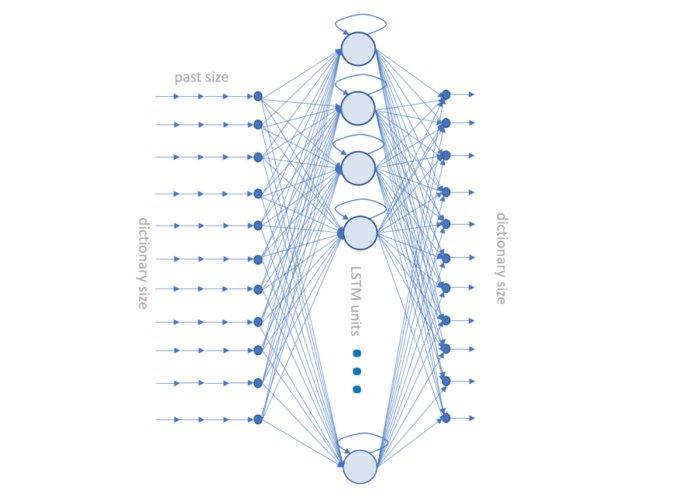

In [ ]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool) #input
y = np.zeros((len(sentences), len(chars)), dtype=np.bool) #output
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [ ]:
x.shape

(186070, 30, 40)

In [ ]:
x[0, 0] #first char of first seq

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
import sys
cattura = lambda preds : np.argmax(preds)
def testAfterEpoch(epoch, _):
    
    print()
    print()
    print('**************Epoch: %d**************' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    
  

    generated = ''
    sentence = text[start_index: start_index + maxlen] #crea un chunk di 30 caratteri a partire da un indice a caso
    generated += sentence
    print('*******************Frase di partenza*****************')
    print(sentence)
    print('*****************************************************')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = cattura(preds)#np.argmax(preds)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)



In [ ]:
model.fit(x, y,
          batch_size=2048,
          epochs=60,
          callbacks=[print_callback])

Epoch 1/60
91/91 [==============================] - 11s 47ms/step - loss: 2.5321


**************Epoch: 0**************
*******************Frase di partenza*****************
i dietro a' miei dottori,
  co
*****************************************************
i dietro a' miei dottori,
  cor cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a cor a co
Epoch 2/60
91/91 [==============================] - 4s 46ms/step - loss: 1.9608


**************Epoch: 1**************
*******************Frase di partenza*****************
tta a la montagna;
  e cesare,
*****************************************************
tta a la montagna;
  e cesare, che son ser con si fo

The result is obviously not worthy of the author of the original text 🙂 but there are two or three really interesting things.

The first, which is immediately noticeable, is the fact that the neural network has learned a kind of metalanguage that gives a sort of Italian divine comedy style.

If you notice some words do not exist but they seem to be verisimilarly Italian words. In several points it seems to find the same rhythm in the verses and in addition it has learned to wrap at the right time.

## Toy GAN Example

In [ ]:

# example of training the discriminator model on real and random mnist images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Reshape
from keras.utils.vis_utils import plot_model
from numpy.random import randn



11501568/11490434 [==============================] - 0s 0us/step


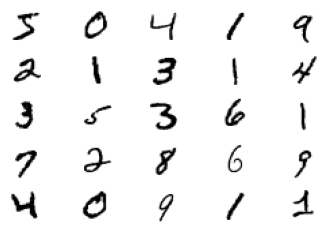

In [ ]:
from keras.datasets.mnist import load_data
from matplotlib import pyplot
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
	pyplot.subplot(5, 5, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

The first step is to define the discriminator model.

The model must take a sample image from our dataset as input and output a classification prediction as to whether the sample is real or fake.

In [ ]:
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

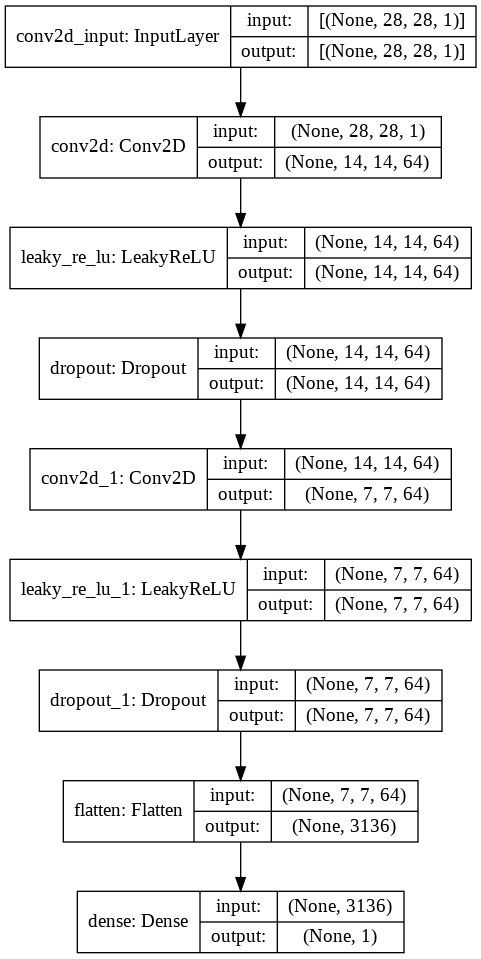

In [ ]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#generate simple real and fake data
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=51% fake=57%
>2 real=56% fake=71%
>3 real=61% fake=82%
>4 real=53% fake=91%
>5 real=66% fake=98%
>6 real=63% fake=99%
>7 real=59% fake=100%
>8 real=56% fake=100%
>9 real=65% fake=100%
>10 real=55% fake=100%
>11 real=67% fake=100%
>12 real=66% fake=100%
>13 real=63% fake=100%
>14 real=66% fake=100%
>15 real=61% fake=100%
>16 real=66% fake=100%
>17 real=73% fake=100%
>18 real=74% fake=100%
>19 real=77% fake=100%
>20 real=81% fake=100%
>21 real=78% fake=100%
>22 real=78% fake=100%
>23 real=85% fake=100%
>24 real=85% fake=100%
>25 real=91% fake=100%
>26 real=93% fake=100%
>27 real=97% fake=100%
>28 real=95% fake=100%
>29 real=95% fake=100%
>30 real=96% fake=100%
>31 real=99% fake=100%
>32 real=99% fake=100%
>33 real=98% fake=100%
>34 real=99% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fak

The latent space is an arbitrarily defined vector space of Gaussian-distributed values, e.g. 100 dimensions. It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space, MNIST images, that only the generator knows how to turn into plausible MNIST images.

* Inputs: Point in latent space, e.g. a 100 element 
vector of Gaussian random numbers.
* Outputs: Two-dimensional square grayscale image of 28×28 pixels with pixel values in [0,1].

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 128)      

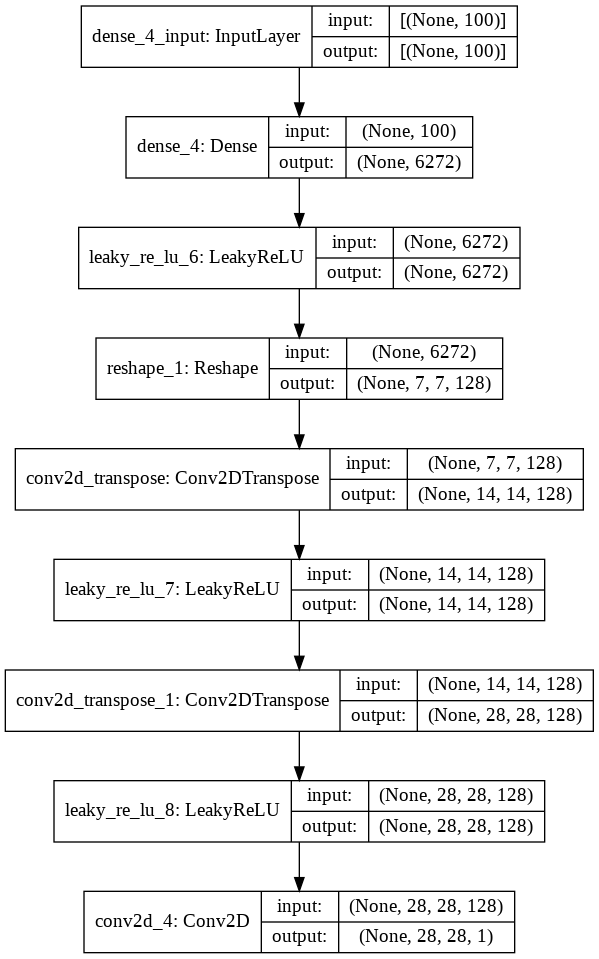

In [ ]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

We can demonstrate how to use it to generate samples. The first step is to generate new points in the latent space.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

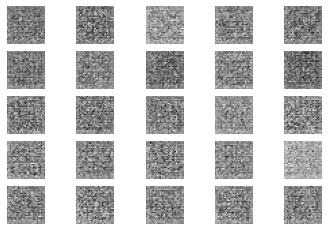

In [ ]:
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()

As the model is not trained, the generated images are completely random pixel values in [0, 1].



The weights in the generator model are updated based on the performance of the discriminator model.

When the discriminator is good at detecting fake samples, the generator is updated more, and when the discriminator model is relatively poor or confused when detecting fake samples, the generator model is updated less.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


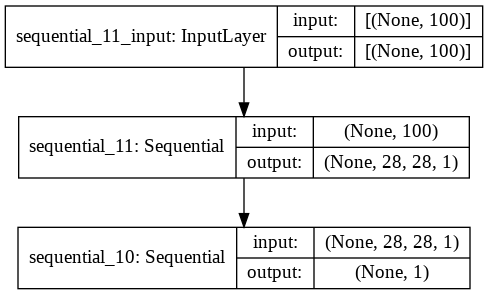

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [ ]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Output streaming troncato alle ultime 5000 righe.
>79, 155/234, d=0.685, g=0.703
>79, 156/234, d=0.688, g=0.707
>79, 157/234, d=0.687, g=0.693
>79, 158/234, d=0.691, g=0.678
>79, 159/234, d=0.689, g=0.712
>79, 160/234, d=0.689, g=0.704
>79, 161/234, d=0.683, g=0.696
>79, 162/234, d=0.694, g=0.683
>79, 163/234, d=0.700, g=0.672
>79, 164/234, d=0.692, g=0.691
>79, 165/234, d=0.688, g=0.711
>79, 166/234, d=0.691, g=0.727
>79, 167/234, d=0.692, g=0.718
>79, 168/234, d=0.689, g=0.687
>79, 169/234, d=0.689, g=0.698
>79, 170/234, d=0.681, g=0.705
>79, 171/234, d=0.681, g=0.704
>79, 172/234, d=0.694, g=0.704
>79, 173/234, d=0.691, g=0.708
>79, 174/234, d=0.697, g=0.710
>79, 175/234, d=0.689, g=0.712
>79, 176/234, d=0.694, g=0.703
>79, 177/234, d=0.694, g=0.718
>79, 178/234, d=0.692, g=0.714
>79, 179/234, d=0.688, g=0.712
>79, 180/234, d=0.698, g=0.687
>79, 181/234, d=0.695, g=0.671
>79, 182/234, d=0.686, g=0.690
>79, 183/234, d=0.687, g=0.712
>79, 184/234, d=0.694, g=0.729
>79, 185/234, d=0.69

Once a final generator model is selected, it can be used in a standalone manner for your application.



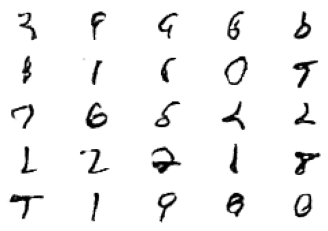

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()
 
# load model
model = load_model('generator_model_100.h5', compile=False)
# generate images
latent_points = generate_latent_points(100, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)

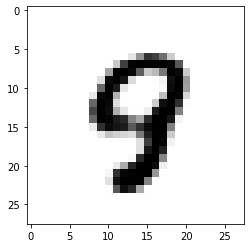

In [ ]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
model = load_model('generator_model_100.h5', compile=False)
# all 0s
vector = asarray([[0.1 for _ in range(100)]])
# generate image
X = model.predict(vector)
# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()